In [22]:
import math
import numpy
from matplotlib import pyplot 
%matplotlib inline

In [23]:
#establish grid 
N = 51 
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [24]:
#load data files
airfoil_x = numpy.loadtxt('NACA0012_x.txt')
airfoil_y = numpy.loadtxt('NACA0012_y.txt')
sigma = numpy.loadtxt('NACA0012_sigma.txt')

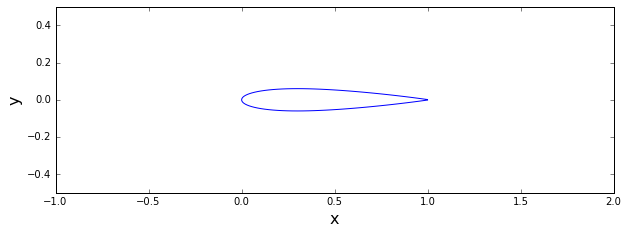

In [25]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(airfoil_x, airfoil_y)

In [26]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink
    strength: strength of the source/sink
    xs: x-coordinate of source/sink
    ys: y-coordinate of source/sink
    
    X: x-coordinate of the mesh points
    Y: y-coordinate of the mesh points
    
    u: x-component of the velocity vector field 
    v: y-component of the velocity vector field 
    """
    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2 + (Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2 + (Y-ys)**2)
    
    return u,v

In [27]:
len(sigma)

100